# Trading Signal Features

---

### Import Libraries and Dependencies

In [23]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [24]:
# Set path to CSV and read in CSV
csv_path = Path('AAPL.csv')
aapl_df=pd.read_csv(csv_path)
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600
1,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600
2,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000
3,2016-01-11,24.742500,24.764999,24.334999,24.632500,22.821304,198957600
4,2016-01-12,25.137501,25.172501,24.709999,24.990000,23.152521,196616800


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [25]:
# Set index as datetime object and drop extraneous columns
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
aapl_df.drop(columns=['Date'], inplace=True) # Timestamp is now the index and we don't need a separate Timestamp column
aapl_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000
2016-01-11,24.742500,24.764999,24.334999,24.632500,22.821304,198957600
2016-01-12,25.137501,25.172501,24.709999,24.990000,23.152521,196616800
2016-01-13,25.080000,25.297501,24.325001,24.347500,22.557264,249758400
2016-01-14,24.490000,25.120001,23.934999,24.879999,23.050606,252680400
2016-01-15,24.049999,24.427500,23.840000,24.282499,22.497040,319335600
2016-01-19,24.602501,24.662500,23.875000,24.165001,22.388184,212350800


### Drop NAs and Calculate Daily Returns 

In [26]:
# Drop NAs and calculate daily percent return
aapl_df['daily_return'] = aapl_df['Close'].dropna().pct_change()
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600,NaN
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600,-0.042205
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000,0.005288
2016-01-11,24.742500,24.764999,24.334999,24.632500,22.821304,198957600,0.016192
2016-01-12,25.137501,25.172501,24.709999,24.990000,23.152521,196616800,0.014513


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [27]:
# Set short and long windows
short_window = 5 # Was 1
long_window = 50 # Was 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
aapl_df['fast_close'] = aapl_df['Close'].ewm(halflife=short_window).mean()
aapl_df['slow_close'] = aapl_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
aapl_df['crossover_long'] = np.where(aapl_df['fast_close'] > aapl_df['slow_close'], 1.0, 0.0)
aapl_df['crossover_short'] = np.where(aapl_df['fast_close'] < aapl_df['slow_close'], -1.0, 0.0)
aapl_df['crossover_signal'] = aapl_df['crossover_long'] + aapl_df['crossover_short']

aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,,,,,,
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600,NaN,25.174999,25.174999,0.0,0.0,0.0
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600,-0.042205,24.606984,24.640067,0.0,-1.0,-1.0
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000,0.005288,24.467362,24.504858,0.0,-1.0,-1.0
2016-01-11,24.742500,24.764999,24.334999,24.632500,22.821304,198957600,0.016192,24.517584,24.537435,0.0,-1.0,-1.0
2016-01-12,25.137501,25.172501,24.709999,24.990000,23.152521,196616800,0.014513,24.639892,24.630475,1.0,0.0,1.0


### Plot Exponential Moving Average of Closing Prices

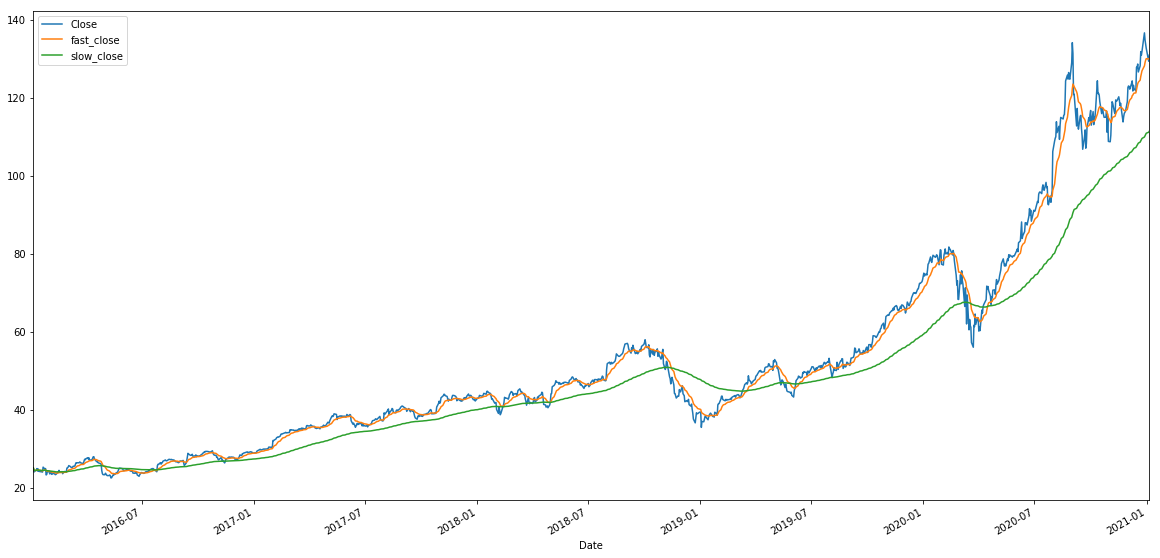

In [28]:
# Plot the EMA of AAPL closing prices
aapl_df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [29]:
# Set short and long volatility windows
short_vol_window = 5 # Was 1
long_vol_window = 50 # Was 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
aapl_df['fast_vol'] = aapl_df['daily_return'].ewm(halflife=short_vol_window).std() # Only change from before is change mean() to std()and daily return versus closing price
aapl_df['slow_vol'] = aapl_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
aapl_df['vol_trend_long'] = np.where(aapl_df['fast_vol'] < aapl_df['slow_vol'], 1.0, 0.0)
aapl_df['vol_trend_short'] = np.where(aapl_df['fast_vol'] > aapl_df['slow_vol'], -1.0, 0.0) 
aapl_df['vol_trend_signal'] = aapl_df['vol_trend_long'] + aapl_df['vol_trend_short']

aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,,,,,,
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600,NaN,25.174999,25.174999,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600,-0.042205,24.606984,24.640067,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000,0.005288,24.467362,24.504858,0.0,-1.0,-1.0,0.033582,0.033582,0.0,0.0,0.0
2016-01-11,24.742500,24.764999,24.334999,24.632500,22.821304,198957600,0.016192,24.517584,24.537435,0.0,-1.0,-1.0,0.030208,0.030970,1.0,0.0,1.0
2016-01-12,25.137501,25.172501,24.709999,24.990000,23.152521,196616800,0.014513,24.639892,24.630475,1.0,0.0,1.0,0.025799,0.027357,1.0,0.0,1.0


### Plot Exponential Moving Average of Daily Return Volatility

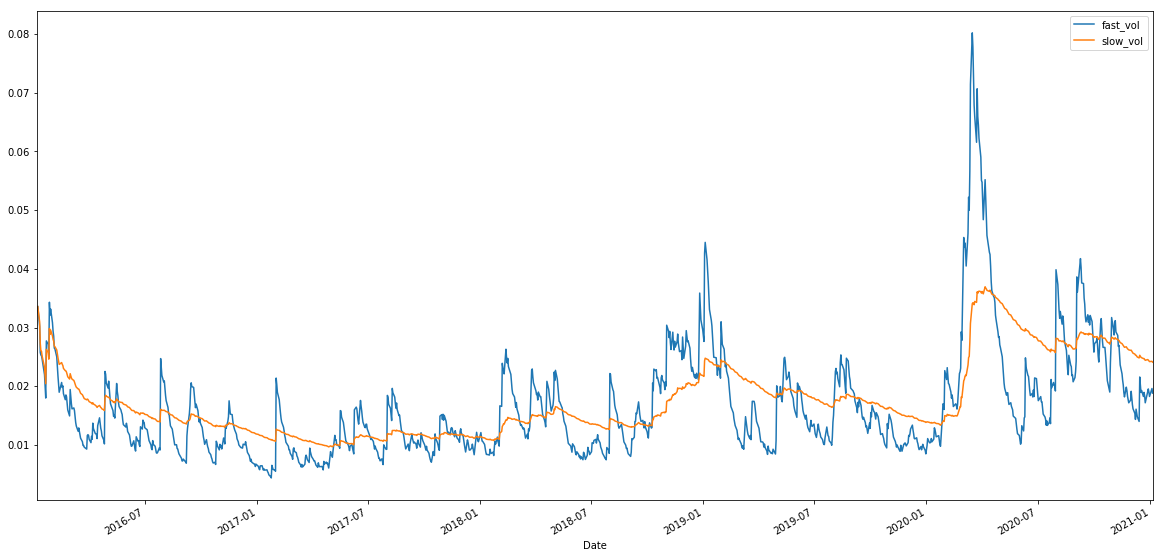

In [30]:
# Plot the EMA of AAPL daily return volatility
aapl_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [31]:
# Set bollinger band window
bollinger_window = 50 # Was 20

# Calculate rolling mean and standard deviation
aapl_df['bollinger_mid_band'] = aapl_df['Close'].rolling(window=bollinger_window).mean()
aapl_df['bollinger_std'] = aapl_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band (= 1 standard deviation)
aapl_df['bollinger_upper_band']  = aapl_df['bollinger_mid_band'] + (aapl_df['bollinger_std'] * 1)
aapl_df['bollinger_lower_band']  = aapl_df['bollinger_mid_band'] - (aapl_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
aapl_df['bollinger_long'] = np.where(aapl_df['Close'] < aapl_df['bollinger_lower_band'], 1.0, 0.0)
aapl_df['bollinger_short'] = np.where(aapl_df['Close'] > aapl_df['bollinger_upper_band'], -1.0, 0.0)
aapl_df['bollinger_signal'] = aapl_df['bollinger_long'] + aapl_df['bollinger_short']

aapl_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-21,125.019997,128.309998,123.449997,128.229996,128.229996,121251600,0.012395,124.574649,108.686679,1.0,...,1.0,0.0,1.0,119.1746,4.413780,123.588380,114.760819,0.0,-1.0,-1.0
2020-12-22,131.610001,134.410004,129.649994,131.880005,131.880005,168904800,0.028465,125.520323,109.005988,1.0,...,1.0,0.0,1.0,119.3242,4.413620,123.737819,114.910580,0.0,-1.0,-1.0
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.960007,88223700,-0.006976,126.224487,109.308236,1.0,...,1.0,0.0,1.0,119.5214,4.290210,123.811610,115.231190,0.0,-1.0,-1.0
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.970001,54930100,0.007712,126.968241,109.620227,1.0,...,1.0,0.0,1.0,119.7370,4.190395,123.927395,115.546605,0.0,-1.0,-1.0
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.690002,124486200,0.035766,128.226717,109.992904,1.0,...,1.0,0.0,1.0,120.0566,4.491252,124.547852,115.565348,0.0,-1.0,-1.0
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.869995,121047300,-0.013315,129.086686,110.335395,1.0,...,1.0,0.0,1.0,120.3736,4.611354,124.984954,115.762246,0.0,-1.0,-1.0
2020-12-30,135.580002,135.990005,133.399994,133.720001,133.720001,96452100,-0.008527,129.686466,110.657338,1.0,...,1.0,0.0,1.0,120.7284,4.765221,125.493621,115.963179,0.0,-1.0,-1.0
2020-12-31,134.080002,134.740005,131.720001,132.690002,132.690002,98990400,-0.007703,130.075272,110.960668,1.0,...,1.0,0.0,1.0,121.0320,4.807043,125.839043,116.224957,0.0,-1.0,-1.0
2021-01-04,133.520004,133.610001,126.760002,129.410004,129.410004,143301900,-0.024719,129.989153,111.214665,1.0,...,1.0,0.0,1.0,121.2828,4.683888,125.966688,116.598912,0.0,-1.0,-1.0


### Plot Bollinger Bands

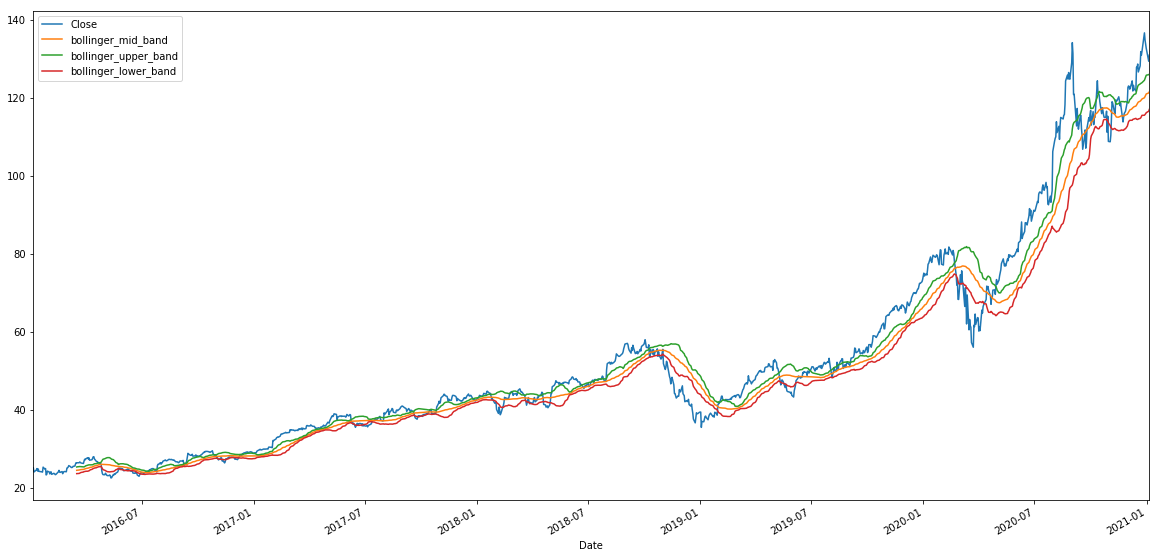

In [32]:
# Plot the Bollinger Bands for AAPL closing prices
aapl_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [33]:
aapl_df.to_csv(r'trading_signals.csv')